In [2]:
import zipfile
import pandas as pd

# Specify the ZIP file path
zip_file_path = "/workspaces/Data-Science-Projects/CausalML/healthcareml/diabetes+130-us+hospitals+for+years+1999-2008.zip"

# Specify the target file you want to load
target_file = "diabetic_data.csv"

# Open the ZIP file and extract the target file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Check the list of files in the ZIP
    print("Files in ZIP:", zip_ref.namelist())
    
    # Extract and load the target file
    with zip_ref.open(target_file) as file:
        data = pd.read_csv(file)


Files in ZIP: ['diabetic_data.csv', 'IDS_mapping.csv']


In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:

selected_columns = ['race', 'gender', 'age', 'admission_type_id', 
                    'time_in_hospital', 'num_lab_procedures', 
                    'num_medications', 'number_diagnoses', 
                    'change', 'diabetesMed', 'readmitted']
# Focus on selected features
data = data[selected_columns]

# Remove rows with invalid or unknown values
data = data[~data['race'].isin(['?'])]
data = data[~data['gender'].isin(['Unknown/Invalid'])]

# Binary encoding for treatment and outcome
data['diabetesMed_binary'] = (data['diabetesMed'] == 'Yes').astype(int)
data['readmitted_binary'] = (data['readmitted'] != 'NO').astype(int)

# Encode categorical variables using one-hot encoding
categorical_columns = ['gender', 'race', 'age', 'admission_type_id', 
                       'time_in_hospital', 'num_lab_procedures', 
                       'num_medications', 'number_diagnoses', 'change']

# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, 
                               columns=categorical_columns, 
                               drop_first=True)

data_encoded.head()

,diabetesMed,readmitted,diabetesMed_binary,readmitted_binary,gender_Male,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),...,number_diagnoses_8,number_diagnoses_9,number_diagnoses_10,number_diagnoses_11,number_diagnoses_12,number_diagnoses_13,number_diagnoses_14,number_diagnoses_15,number_diagnoses_16,change_No
0,No,NO,0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Yes,>30,1,1,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,Yes,NO,1,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Yes,NO,1,0,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Yes,NO,1,0,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data_encoded = data_encoded.drop(["diabetesMed", "readmitted"], axis=1)

In [8]:
data_encoded.columns

Index(['diabetesMed_binary', 'readmitted_binary', 'gender_Male', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)',
       ...
       'number_diagnoses_8', 'number_diagnoses_9', 'number_diagnoses_10',
       'number_diagnoses_11', 'number_diagnoses_12', 'number_diagnoses_13',
       'number_diagnoses_14', 'number_diagnoses_15', 'number_diagnoses_16',
       'change_No'],
      dtype='object', length=243)

## Specifying CausalModel without specifying DAG

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


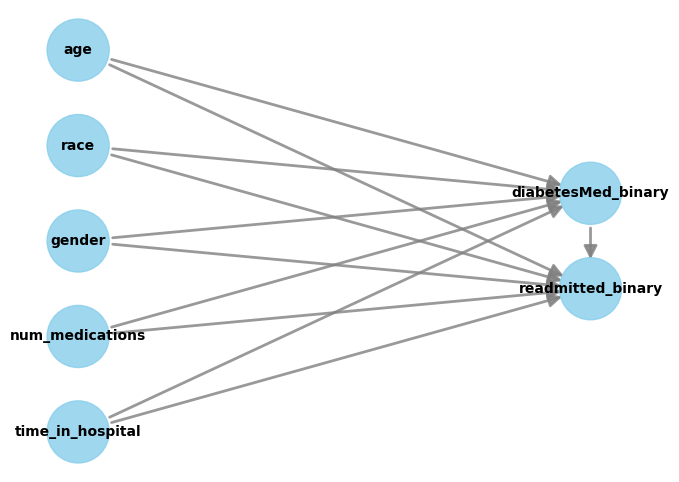

In [9]:
from dowhy import CausalModel

# Define the dataset structure
model = CausalModel(
    data=data,
    treatment="diabetesMed_binary",  # Whether diabetes medication was prescribed
    outcome="readmitted_binary",     # Outcome: Readmission status
    common_causes=["age", "race", "gender", "num_medications", "time_in_hospital"]
)

# Visualize the DAG
model.view_model()


### Identifying the causal effect to be estimated 
[Understanding Estimands](README.md#Estimands)



In [10]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   
─────────────────────(E[readmitted_binary|age,race,num_medications,gender,time
d[diabetesMed_binary]                                                         

              
_in_hospital])
              
Estimand assumption 1, Unconfoundedness: If U→{diabetesMed_binary} and U→readmitted_binary then P(readmitted_binary|diabetesMed_binary,age,race,num_medications,gender,time_in_hospital,U) = P(readmitted_binary|diabetesMed_binary,age,race,num_medications,gender,time_in_hospital)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Estimation of Causal Effect
[Estimating Causal Effects](README.md#CausalEffectsEstimation)

In [ ]:
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching"
)
print(f"Causal Effect Estimate: {estimate.value}")

Causal Effect Estimate: 0.06617617496884172


### Refutation
[Refutation in Causal Inference](README.md#Refutation)

In [11]:
# Refute the estimate
refutation = model.refute_estimate(
    identified_estimand, estimate, method_name="placebo_treatment_refuter"
)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.060175692517991396
New effect:0.00017619507096047906
p value:0.94



## Model Comparison

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Split data
X = data_encoded.drop(columns=['readmitted_binary'])
y = data['readmitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.5552540328659732
F1 Score: 0.4785529106764082


#### Using Linear Regression on the Causal Model

In [13]:
# Estimate using linear regression
estimate_lr = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print(f"Linear Regression Estimate: {estimate_lr.value}")


Linear Regression Estimate: 0.06880874866015574


/usr/local/python/3.12.1/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [14]:
# Estimate using inverse propensity weighting
estimate_ipw = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_weighting"
)
print(f"Inverse Propensity Weighting Estimate: {estimate_ipw.value}")


Inverse Propensity Weighting Estimate: 0.06254068434236254


In [15]:
# Summarize results
print(f"Propensity Score Matching Estimate: {estimate.value}")
print(f"Linear Regression Estimate: {estimate_lr.value}")
print(f"Inverse Propensity Weighting Estimate: {estimate_ipw.value}")


Propensity Score Matching Estimate: 0.06617617496884172
Linear Regression Estimate: 0.06880874866015574
Inverse Propensity Weighting Estimate: 0.06254068434236254


In [ ]:
# %%
output_file_path = "/workspaces/Data-Science-Projects/CausalML/healthcareml/X.csv"
X.to_csv(output_file_path, index=False)

# %%
import re
X.columns = [re.sub(r'[()\[\]<>\s]', '', col) for col in X.columns]
X.columns

# %%
# Remove square brackets, parentheses, and replace hyphens with underscores

X.columns = [col.replace('[', '').replace(']', '').replace('(', '').replace(')', '').replace('-', '_') for col in X.columns]
X

# %%
X = data_encoded.drop(columns=['readmitted_binary'])

# %%
import re
import csv

file_path = '/workspaces/Data-Science-Projects/CausalML/healthcareml/X.csv'
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    first_line = next(reader)  # Reads the first line

# Clean the column names using regex
def clean_column_name(col_name):
    # Remove any character that isn't a letter, number, or underscore
    col_name = re.sub(r'[^0-9a-zA-Z_]', '', col_name)  
    # Ensure the name starts with a letter or underscore
    if col_name[0].isdigit():
        col_name = '_' + col_name
    return col_name

# Apply cleaning to all columns
cleaned_columns = [clean_column_name(col) for col in first_line]

# Print cleaned columns
print(cleaned_columns)

X.columns = cleaned_columns

# Verify the new column names
print(X.columns)

# %%
X.head()

# %%
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(random_state=42)
X = X
y = data['readmitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))


# %%
print(model._data.keys())  # To see the available keys

# %%
# Add causal features to the dataset
X_train['causal_feature'] = model._data['propensity_score'][:len(X_train)]
X_test['causal_feature'] = model._data['propensity_score'][len(X_train):]

# Retrain with causal features
xgb_causal = XGBClassifier(random_state=42)
xgb_causal.fit(X_train, y_train)
y_pred_xgb_causal = xgb_causal.predict(X_test)

# Evaluate the model
print("XGBoost with Causal Features - Accuracy:", accuracy_score(y_test, y_pred_xgb_causal))
print("XGBoost with Causal Features - F1 Score:", f1_score(y_test, y_pred_xgb_causal))


# %%

# Initialize SHAP for the XGBoost model with causal features
explainer_causal = shap.TreeExplainer(xgb_causal)
shap_values_causal = explainer_causal.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values_causal, X_test)


# %%
data.isna.count()

# %%
df = data

# %%
# List of columns to convert to numeric values
columns_to_convert = [
    'race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
    'num_lab_procedures', 'num_medications', 'number_diagnoses', 'change', 'diabetesMed_binary', 'readmitted_binary'
]

# Function to convert columns to numeric values based on unique values
def convert_to_numeric(df, columns):
    for column in columns:
        if df[column].dtype == 'object':  # Check if column is categorical
            unique_values = df[column].unique()
            value_mapping = {value: idx for idx, value in enumerate(unique_values)}
            df[column] = df[column].map(value_mapping)
    return df

# Apply conversion to numeric values
df = convert_to_numeric(df, columns_to_convert)
df = df.drop(["diabetesMed", "readmitted"], axis=1)
# Now the DataFrame 'df' will have the categorical columns converted to numeric values
print(df.head())


# %%
from causallearn.search.ConstraintBased.PC import pc

labels = [f'{col}' for i, col in enumerate(df.columns)]
df = df.to_numpy()

cg = pc(df)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# %%
from dowhy import CausalModel
# Define the causal graph as a string, ensuring it connects treatment, outcome, and common causes
graph = """
digraph {
    {}
}
""".format(graph_string)

# Define the causal model with the dataset and the causal graph
model_pc = CausalModel(
    data=data_encoded,
    treatment="diabetesMed_binary",  # Treatment variable: Whether diabetes medication was prescribed
    outcome="readmitted_binary",     # Outcome variable: Readmission status
    common_causes=["age", "race", "gender", "num_medications", "time_in_hospital"],  # Confounders
    graph=graph  # Provide the causal graph structure
)

# Visualize the causal graph
model_pc.view_model()

# %%
from causallearn.search.FCMBased import lingam
model_lingam = lingam.ICALiNGAM()
model_lingam.fit(data)

# %%
from causallearn.search.FCMBased.lingam.utils import make_dot

# Fit the model
model_lingam = lingam.ICALiNGAM()
model_lingam.fit(data)

# Extract the adjacency matrix from the fitted model
adjacency_matrix = model_lingam.adjacency_matrix_

# Create an empty string for the graph
graph_string = ""

# Iterate over the adjacency matrix and convert it to a graph string
for i, row in enumerate(adjacency_matrix):
    for j, value in enumerate(row):
        if value != 0:  # If there's a relationship (non-zero value)
            # Add the edge to the graph string
            graph_string += f"{labels[i]} -> {labels[j]};\n"

# Print the graph string
print(graph_string)


# %%
from dowhy import CausalModel
# Define the causal graph as a string, ensuring it connects treatment, outcome, and common causes


# Define the causal model with the dataset and the causal graph
model_lingam = CausalModel(
    data=data_encoded,
    treatment="diabetesMed_binary",  # Treatment variable: Whether diabetes medication was prescribed
    outcome="readmitted_binary",     # Outcome variable: Readmission status
    common_causes=["age", "race", "gender", "num_medications", "time_in_hospital"],  # Confounders
    graph=graph  # Provide the causal graph structure
)

# Visualize the causal graph
model_lingam.view_model()

# %%
labels = data.columns.tolist()
labels

# %%
from causallearn.search.FCMBased.lingam.utils import make_dot
make_dot(model_lingam.adjacency_matrix_, labels=labels)

# %%
graph_string = ""
make_dot(model_lingam.adjacency_matrix_, labels=labels, graph=graph_string)

# %%
# Identify confounders using backdoor criterion
identified_estimand = model_pc.identify_effect()
print("Identified Estimand:")
print(identified_estimand)

